### **Unsupervised Learning** - *K - Means Clustering*



**Online Retail Dataset**

Contains all transactionsoccuring between 1/12/2010 to 10/12/2011 for a UK Based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Mostly the customers of the company are wholesellers.

**Goal:**
Trying to find how many customer segments are there which could be 
useful for the business

### Steps for Analysis


1.   Read the data
2.   Clean the data
3.   Prepare the data for modelling
4.   Modelling
5.   Find Analysis and make recommendations



### **Read the data**

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [301]:
df = pd.read_csv('Online+Retail.csv',encoding = 'latin1')

In [302]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [303]:
df.shape

(541909, 8)

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### **Clean the Data**

#### Missing values

In [305]:
# Percentage of missing values
round(df.isnull().mean()[df.isnull().sum()>0]*100,2)

Description     0.27
CustomerID     24.93
dtype: float64

We see the 0.27% and ~25% of data missing for the description and customerID columns respectively

In [306]:
### Drop all rows with missing values

df.dropna(inplace = True)
df.shape

(406829, 8)

### **Prepare the data for modelling**

**We will be doing the clustering based on the below parameters/features**

R (Recency) : Number of days since last purchased

F (Frequency) : Number of transactions

M (Monetary) : Total amount of transactions

**We need to create the above features from the given Dataset**


#### Monetary

In [307]:

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [308]:
df['Amount'] = df['Quantity'] * df['UnitPrice']

In [309]:
df_new = df.groupby(['CustomerID'])['Amount'].sum()

In [310]:
df_monetary = pd.DataFrame(df_new)

In [311]:
df_monetary.reset_index(inplace = True)

In [312]:
df_monetary.columns = ['CustomerID','Monetary']

In [313]:
df_monetary

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


#### Frequency

In [314]:
df_frequency = pd.DataFrame(df.groupby(['CustomerID'])['InvoiceNo'].count())

In [315]:
df_frequency.reset_index(inplace = True)

In [316]:
df_frequency.columns = ['CustomerID','Frequency']

In [317]:
df_frequency

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [318]:
grouped_df = pd.merge(df_monetary,df_frequency,on = 'CustomerID',how = 'inner')

In [319]:
grouped_df

,CustomerID,Monetary,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


#### Recency

In [320]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Amount         float64
dtype: object

In [321]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%d-%m-%Y %H:%M')

In [322]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [323]:
df_recency = pd.DataFrame(df.groupby(['CustomerID'])['InvoiceDate'].max())

In [324]:
df_recency.reset_index(inplace = True)

In [325]:
df_recency['Last Date'] = df['InvoiceDate'].max()

In [326]:
df_recency['Recency'] = df_recency['Last Date'] - df_recency['InvoiceDate']

In [327]:
df_recency

,CustomerID,InvoiceDate,Last Date,Recency
0,12346.0,2011-01-18 10:17:00,2011-12-09 12:50:00,325 days 02:33:00
1,12347.0,2011-12-07 15:52:00,2011-12-09 12:50:00,1 days 20:58:00
2,12348.0,2011-09-25 13:13:00,2011-12-09 12:50:00,74 days 23:37:00
3,12349.0,2011-11-21 09:51:00,2011-12-09 12:50:00,18 days 02:59:00
4,12350.0,2011-02-02 16:01:00,2011-12-09 12:50:00,309 days 20:49:00
...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,2011-12-09 12:50:00,277 days 02:58:00
4368,18281.0,2011-06-12 10:53:00,2011-12-09 12:50:00,180 days 01:57:00
4369,18282.0,2011-12-02 11:43:00,2011-12-09 12:50:00,7 days 01:07:00
4370,18283.0,2011-12-06 12:02:00,2011-12-09 12:50:00,3 days 00:48:00


In [328]:
df_recency['Recency'] = df_recency['Recency'].astype('str').apply(lambda x : x.split(' ')[0])

In [329]:
df_recency['Recency']= df_recency['Recency'].astype('int')

In [330]:
df_recency.drop(['InvoiceDate', 'Last Date'], axis = 1,inplace = True)

In [331]:
grouped_df = pd.merge(grouped_df,df_recency,how = 'inner',on = 'CustomerID')

In [332]:
grouped_df

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


#### Outlier Treatment
1. Ststistical : Determined using IQR
2. Domain Specific : Based on Domain knowledge (not necessarily extremes)

In [333]:
grouped_df.describe()

,CustomerID,Monetary,Frequency,Recency
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,1898.459701,93.053294,91.047118
std,1722.390705,8219.345141,232.471608,100.765435
min,12346.000000,-4287.630000,1.000000,0.000000
25%,13812.750000,293.362500,17.000000,16.000000
50%,15300.500000,648.075000,42.000000,49.000000
75%,16778.250000,1611.725000,102.000000,142.000000
max,18287.000000,279489.020000,7983.000000,373.000000


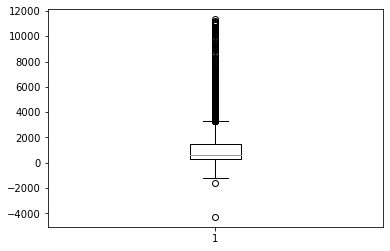

In [342]:
plt.boxplot(grouped_df['Monetary'])
plt.show()

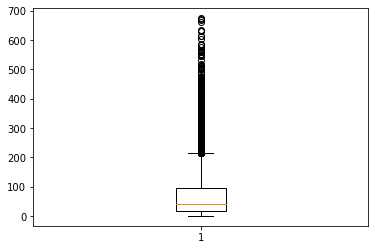

In [343]:
plt.boxplot(grouped_df['Frequency'])
plt.show()

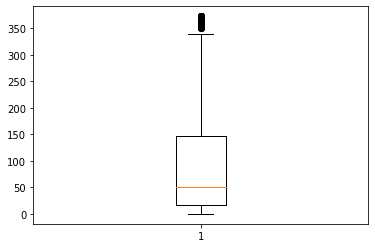

In [344]:
plt.boxplot(grouped_df['Recency'])
plt.show()

Removing Statistical outliers

In [341]:
 Q1 = grouped_df['Monetary'].quantile(0.05)
 Q3 = grouped_df['Monetary'].quantile(0.95)
 IQR = Q3-Q1
 grouped_df = grouped_df[(grouped_df['Monetary']>= Q1 - 1.5*IQR) & (grouped_df['Monetary']<= Q3 + 1.5*IQR)]


 Q1 = grouped_df['Recency'].quantile(0.05)
 Q3 = grouped_df['Recency'].quantile(0.95)
 IQR = Q3-Q1
 grouped_df = grouped_df[(grouped_df['Recency']>= Q1 - 1.5*IQR) & (grouped_df['Recency']<= Q3 + 1.5*IQR)]


 Q1 = grouped_df['Frequency'].quantile(0.05)
 Q3 = grouped_df['Frequency'].quantile(0.95)
 IQR = Q3-Q1
 grouped_df = grouped_df[(grouped_df['Frequency']>= Q1 - 1.5*IQR) & (grouped_df['Frequency']<= Q3 + 1.5*IQR)]



In [345]:
grouped_df

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4366,18278.0,173.90,9,73
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7


### Rescaling

Rescaling is required as the magnitude of the different features varry a lot from the others

As K-Means uses Eucledian Distance to do the clustering, this variance will result in  incorrect clustering

Hence rescaling is required to bring the values of these features to a certain range

In [346]:
rfm_df = grouped_df[['Recency','Frequency','Monetary']]

In [347]:
rfm_df.head()

,Recency,Frequency,Monetary
0,325,2,0.00
1,1,182,4310.00
2,74,31,1797.24
3,18,73,1757.55
4,309,17,334.40


In [348]:
from sklearn.preprocessing import StandardScaler

In [349]:
scaler = StandardScaler()

In [350]:
rfm_df_scaled = scaler.fit_transform(rfm_df)

In [351]:
rfm_df_scaled

array([[ 2.29561314, -0.77179505, -0.75963907],
       [-0.91004465,  1.11721707,  1.91621971],
       [-0.18778225, -0.4674542 ,  0.35617542],
       ...,
       [ 0.86098234, -0.71932249, -0.70946206],
       [-0.85068062, -0.65635542, -0.64999715],
       [-0.50439042, -0.05816825,  0.38103421]])

In [352]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Recency','Frequency','Monetary']

In [353]:
rfm_df_scaled

,Recency,Frequency,Monetary
0,2.295613,-0.771795,-0.759639
1,-0.910045,1.117217,1.916220
2,-0.187782,-0.467454,0.356175
3,-0.741847,-0.026685,0.331534
4,2.137309,-0.614377,-0.552027
...,...,...,...
4266,-0.197676,-0.698333,-0.651673
4267,1.820701,-0.687839,-0.647514
4268,0.860982,-0.719322,-0.709462
4269,-0.850681,-0.656355,-0.649997


### Clustering Tendency using **Hopkins Statistic**

This determines whether the data we have is good to be clustered

**The Hopkins statistic**, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

* If the value is between {0.01, ...,0.3}, the data is regularly spaced.

* If the value is around 0.5, it is random.

* If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [354]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [355]:
hopkins(rfm_df_scaled)

0.951282761410316

We see the value is **~0.99** which means the data has **high tendency to be clustered**

### **Modelling**

In [356]:
from sklearn.cluster import KMeans


In [357]:
# K - Means with some arbitraty k = 4
kmeans = KMeans(n_clusters = 4, max_iter = 50)


In [358]:
model = kmeans.fit(rfm_df_scaled)

In [359]:
model.labels_

array([1, 2, 0, ..., 1, 0, 0])

#### Optimal number of K (clusters)
 
It's not only the statistical factors that determine the optimal number of clusters but the business factors as well.

#### 1. Elbow Curve (Sum of Squared Distances)

In [360]:
range_n_clusters = range(2,9)

sum_of_squared = []
for cluster in range_n_clusters:
  kmeans = KMeans(n_clusters = cluster, max_iter = 50)
  kmeans.fit(rfm_df_scaled)
  sum_of_squared.append(kmeans.inertia_)

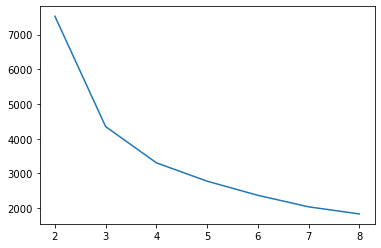

In [361]:
plt.plot(range_n_clusters,sum_of_squared)
plt.show()

the elbow is formed at **k = 3**, concluding that the number of optimal clusters should be 3

#### 2. Silhouette Score (Sum of Squared Distances)

In [362]:
from sklearn.metrics import silhouette_score

In [363]:
range_n_clusters = range(2,9)

s_score = []
for cluster in range_n_clusters:
  kmeans = KMeans(n_clusters = cluster, max_iter = 50)
  kmeans.fit(rfm_df_scaled)
  cluster_labels = kmeans.labels_
  s_score.append(silhouette_score(rfm_df_scaled,cluster_labels))

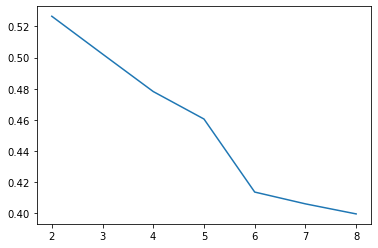

In [364]:
plt.plot(range_n_clusters,s_score)
plt.show()

In [365]:
# Final model with K = 3

kmeans = KMeans(n_clusters = 3, max_iter = 50)
kmeans.fit(rfm_df_scaled)


KMeans(max_iter=50, n_clusters=3)

In [366]:
grouped_df['ClusterID'] = kmeans.labels_

In [367]:
grouped_df


,CustomerID,Monetary,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,0
...,...,...,...,...,...
4366,18278.0,173.90,9,73,1
4367,18280.0,180.60,10,277,0
4368,18281.0,80.82,7,180,0
4369,18282.0,176.60,13,7,1


<AxesSubplot:xlabel='ClusterID', ylabel='Monetary'>

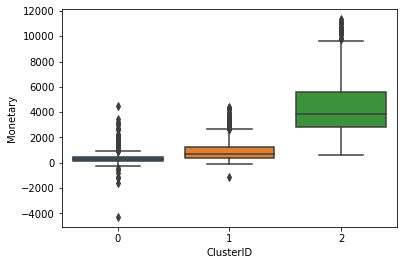

In [368]:
sns.boxplot(x = 'ClusterID',y = 'Monetary',data = grouped_df)

<AxesSubplot:xlabel='ClusterID', ylabel='Recency'>

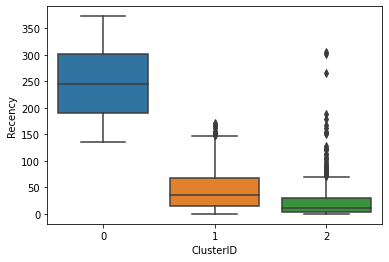

In [369]:
sns.boxplot(x = 'ClusterID',y = 'Recency',data = grouped_df)

<AxesSubplot:xlabel='ClusterID', ylabel='Frequency'>

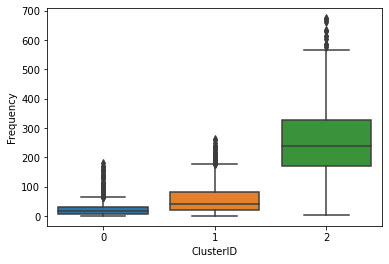

In [370]:
sns.boxplot(x = 'ClusterID',y = 'Frequency',data = grouped_df)

### Finally we are able to create 3 clusters
1.  Cluster 2 represents the **high value customers** who have high buying frequency and have bought products recently
2.  Cluster 0 represents the **low value customers** who have low buying frequency and have a median recency for about 200 days
3.  Cluster 1 represents the **average value customers**